### Calculus 

Calculus is the prerequisite of optimization. 

Ultimate goal `Perform Well on the unseen data`

Derivatives : Rate of change in a function wrt to changes in an argument. 
- How rapidly the loss function would evolve, if we were to change somethings. 

$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$

If the derivates are not avaliable we optimize the surrogate instead.

In [4]:
from matplotlib_inline import backend_inline
import numpy as np 
from d2l import torch as d2l

In [11]:
def f(x) : 
    return 3 * x ** 2 - 4 * x + 6


for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')


h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


#### Rules 

\begin{split}\begin{aligned} \frac{d}{dx} [C f(x)] & = C \frac{d}{dx} f(x) && \textrm{Constant multiple rule} \\ \frac{d}{dx} [f(x) + g(x)] & = \frac{d}{dx} f(x) + \frac{d}{dx} g(x) && \textrm{Sum rule} \\ \frac{d}{dx} [f(x) g(x)] & = f(x) \frac{d}{dx} g(x) + g(x) \frac{d}{dx} f(x) && \textrm{Product rule} \\ \frac{d}{dx} \frac{f(x)}{g(x)} & = \frac{g(x) \frac{d}{dx} f(x) - f(x) \frac{d}{dx} g(x)}{g^2(x)} && \textrm{Quotient rule} \end{aligned}\end{split}


### Common


\begin{split}\begin{aligned} \frac{d}{dx} C & = 0 && \textrm{for any constant $C$} \\ \frac{d}{dx} x^n & = n x^{n-1} && \textrm{for } n \neq 0 \\ \frac{d}{dx} e^x & = e^x \\ \frac{d}{dx} \ln x & = x^{-1}. \end{aligned}\end{split}

In [32]:
# Visulization
import matplotlib.pyplot as plt

#@save
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

#@save
def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    

#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
    

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

1. `hasattr(x, ndim)` -> checks if it has the attribute `ndim`
2. `isinstance(x,list)` -> check if it is an instance of list
3. `d2l.plt.gca()` -> gca stands for get current axes.
4. `axes.cla()` -> clears the axes

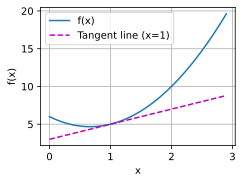

In [33]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x +3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### Partial Differnetiation

In multidimensional setting i.e. $f(x_i)$ what we do is keep every variable constant except 1. 

$\frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$

We can do this for all the variables and get the partial derivative collection as

$\nabla_{\mathbf{x}} f(\mathbf{x}) = \left[\partial_{x_1} f(\mathbf{x}), \partial_{x_2} f(\mathbf{x}), \ldots
\partial_{x_n} f(\mathbf{x})\right]^\top.$ -> Which is differentiation with respect to x at x. 

Some rules : 
- $\nabla_x Ax = A^T \& \nabla_x x^TA = A$ : Why is this so ? Check proof
- $\nabla_x x^TAx = (A + A^T)x = 2Ax$ Given they are symmetric
- $\nabla_x \|x\|^2 = \nabla_x x^Tx = 2x$
- Norms : 
  - $\nabla_x \|x\|_F^2 = 2X$

### Chain Rule
Because of nested function in deep learning it is almost impossible to calculate the gradients directly - so we use the chain rule for the same. 

$
\frac{\partial y}{\partial x_{i}} = \frac{\partial y}{\partial u_{1}} \frac{\partial u_{1}}{\partial x_{i}} + \frac{\partial y}{\partial u_{2}} \frac{\partial u_{2}}{\partial x_{i}} + \ldots + \frac{\partial y}{\partial u_{m}} \frac{\partial u_{m}}{\partial x_{i}} \ \textrm{ and so } \ \nabla_{\mathbf{x}} y =  \mathbf{A} \nabla_{\mathbf{u}} y,
$


#### Discussion 
- Composition rule can be applied to compute the gradient automatically
- Vector valued functions requires us to just mulitply the matrices as we trace the dependency graph from output to input. 
- `forward` : when we evaluate a function
- `backward` : when we compute gradients


In [49]:
# Exercises